In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
## lets create synthetic data points
from sklearn.datasets import make_classification

In [8]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [9]:
x

array([[ 0.46341467,  1.34653104],
       [ 0.41218635, -1.54049889],
       [-1.54647923,  1.59524777],
       ...,
       [ 0.92931768, -0.25462733],
       [-1.27665632,  0.98720521],
       [ 1.47083267,  2.27461793]])

In [10]:
y

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [11]:
pd.DataFrame(x)[0]

0      0.463415
1      0.412186
2     -1.546479
3     -0.594170
4     -1.823298
         ...   
995   -0.197007
996    0.187337
997    0.929318
998   -1.276656
999    1.470833
Name: 0, Length: 1000, dtype: float64

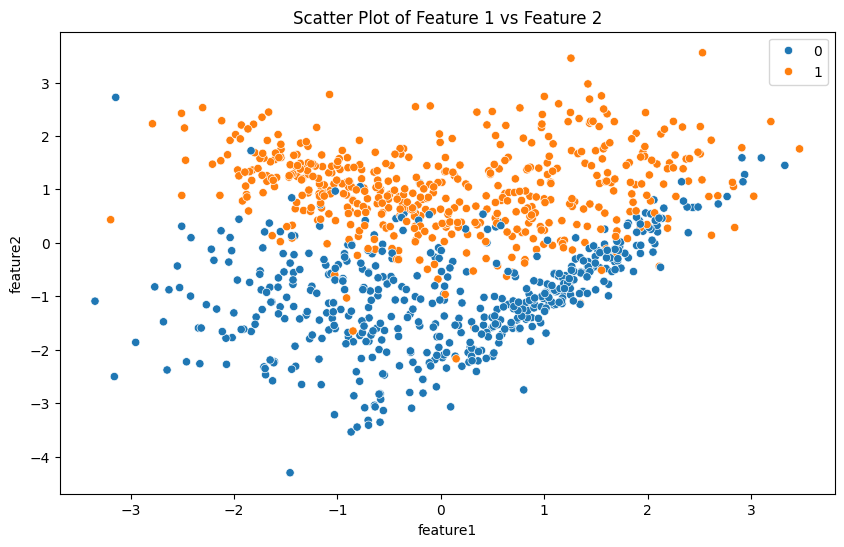

In [12]:
df = pd.DataFrame(x, columns=['feature1', 'feature2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['feature1'], y=df['feature2'], hue=y)
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [14]:
from sklearn.svm import SVC

In [15]:
svc=SVC(kernel='linear')

In [16]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [17]:
y_pred=svc.predict(x_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix


In [20]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       130
           1       0.88      0.92      0.90       120

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[115  15]
 [ 10 110]]


In [21]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)


SVC()

In [26]:
ypred1=rbf.predict(x_test)

In [27]:
print(classification_report(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       130
           1       0.90      0.92      0.91       120

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[118  12]
 [ 10 110]]


In [ ]:
### sigmoid is an another kernel
### can try if needed
## tho bad accuracy

In [ ]:
### hyper parameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

## defining parameter guide

parameter_grid={ 'C': [0.1, 1 , 10, 100, 1000],
                'gamma' : [1, 0.1, 0.01, 0.001, 0.001],
             'kernel': ['rbf']}

In [29]:
grid=GridSearchCV(SVC(),param_grid=parameter_grid,refit=True,cv=5,verbose=3)

In [30]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [32]:
y_pred4=grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       130
           1       0.88      0.93      0.90       120

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250

[[115  15]
 [  9 111]]
